### Feature egineering

- Check: https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10?gi=4adc73ab0614

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. As you may know, a “feature” is any measurable input that can be used in a predictive model — it could be the color of an object or the sound of someone’s voice. Feature engineering, in simple terms, is the act of converting raw observations into desired features using statistical or machine learning approaches.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mnist = pd.read_csv('https://raw.githubusercontent.com/sbussmann/kaggle-mnist/master/Data/train.csv')
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist.shape

(42000, 785)

<AxesSubplot:>

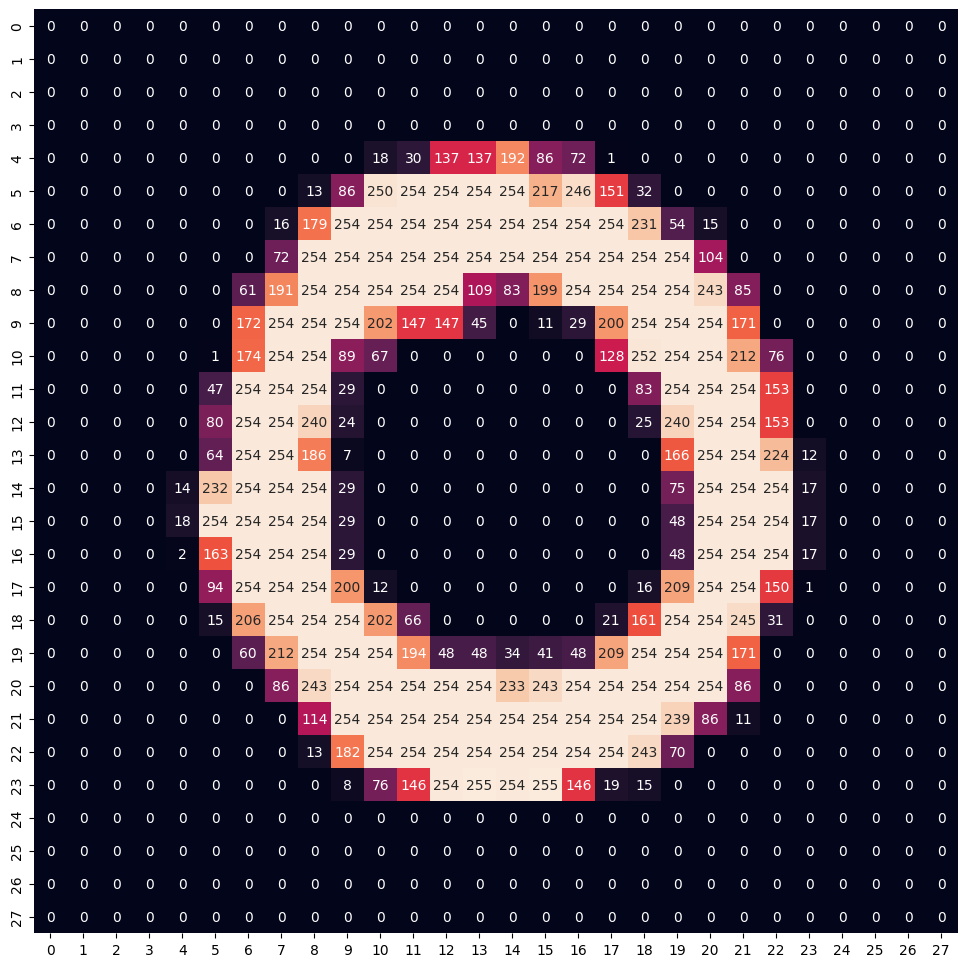

In [ ]:
digit = np.array(mnist.iloc[1][1:])
#digit[np.where(digit)[0]] = 1
plt.figure(figsize=(12,12))
sns.heatmap(digit.reshape(28,28), annot=True, fmt="d", cbar=False, square=True)

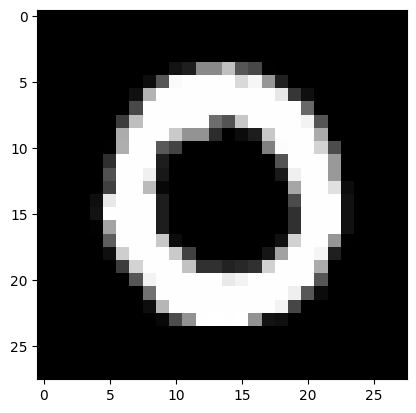

In [ ]:
plt.imshow(digit.reshape(28,28), cmap="gray")

<AxesSubplot:>

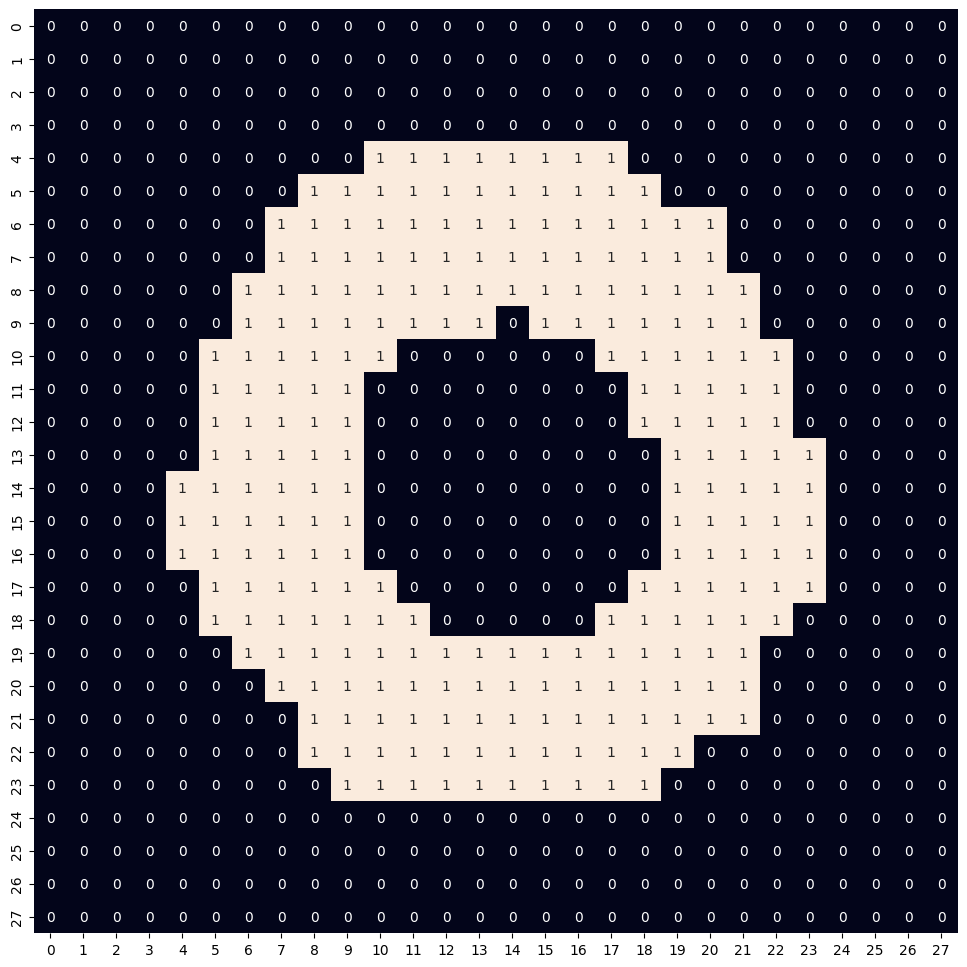

In [ ]:
digit = np.array(mnist.iloc[1][1:])
digit[np.where(digit)[0]] = 1
plt.figure(figsize=(12,12))
sns.heatmap(digit.reshape(28,28), annot=True, fmt="d", cbar=False, square=True)

Check: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

In [ ]:
from skimage .morphology import skeletonize
skeleton = skeletonize(digit.reshape(28,28))

<AxesSubplot:>

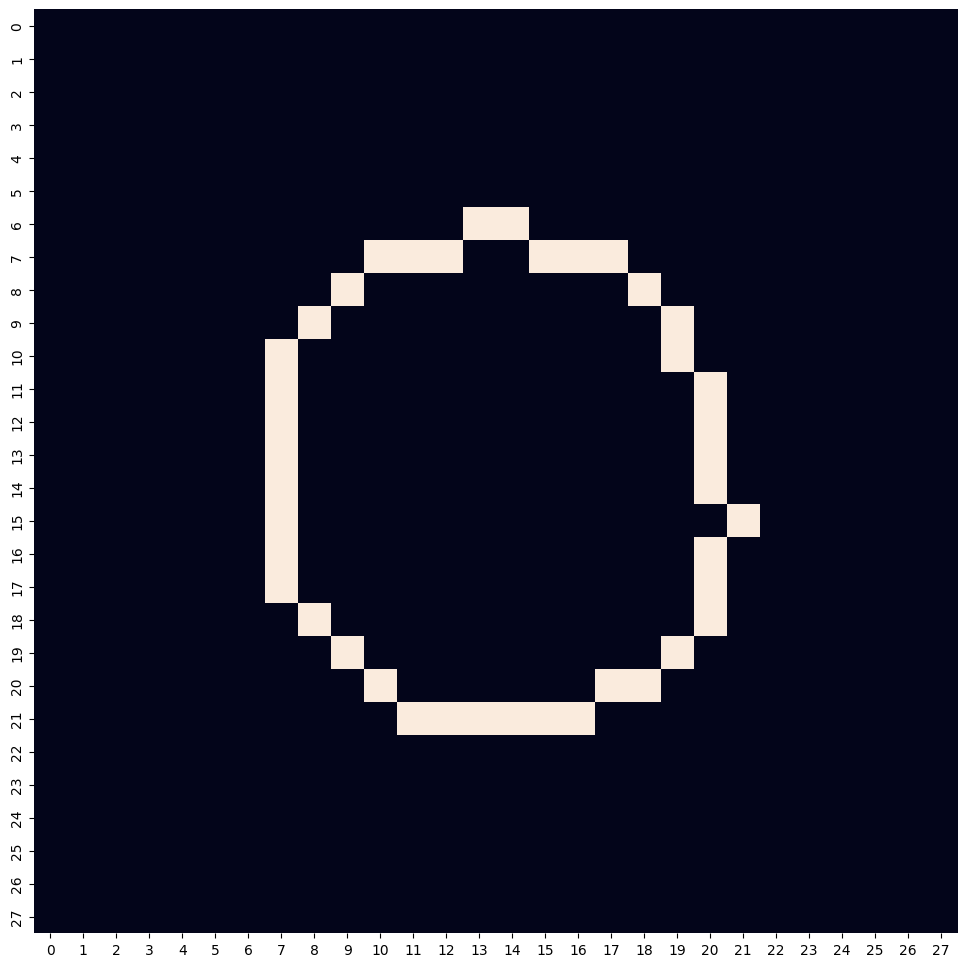

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(skeleton, annot=False, fmt="d", cbar=False, square=True)

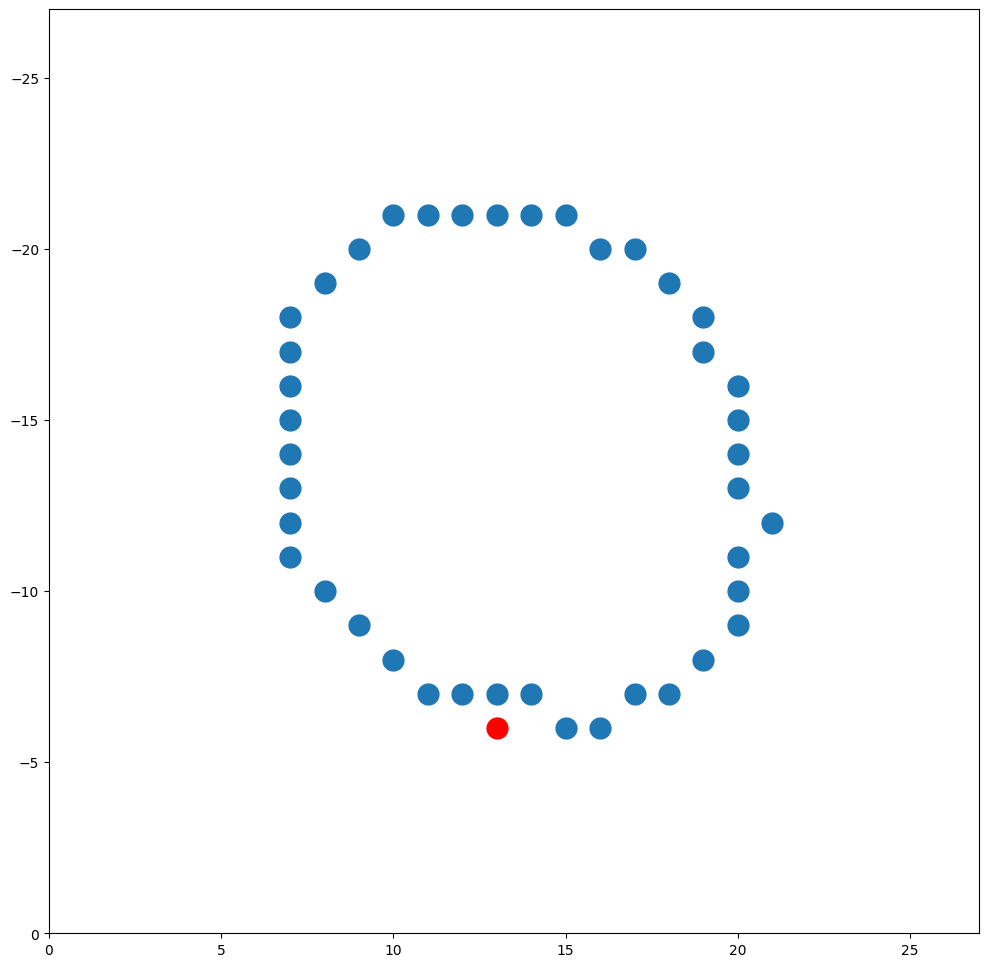

In [ ]:
# where a 1 occurs in the skelotinized image
xy = np.where(skeleton)  
xy = np.array([xyi for xyi in zip(xy[0], xy[1])])
plt.figure(figsize=(12,12))
plt.plot(xy[:,1], -xy[:,0][::-1], '.', markersize=30)
plt.xlim(0,27)
plt.ylim(0,-27)
plt.plot(xy[0,1], -xy[0,0], '.r', markersize=30)

In [ ]:
len(xy)*2, 28*28

(82, 784)

([<matplotlib.axis.XTick at 0x7fadc7fd8250>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

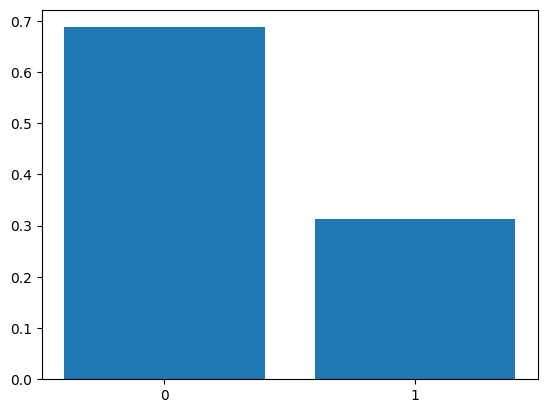

In [ ]:
x, f = np.unique(digit, return_counts=True)
plt.bar(x, f/f.sum())
plt.xticks(x, x)

![](https://1.bp.blogspot.com/-cslmSu68V8A/XrpdK89Sc1I/AAAAAAAAG7g/oVhTso-ItCMPNYKq_4E_i7FMtCr_eEcXACNcBGAsYHQ/s1600/2.png)

(0.0, 10.0)

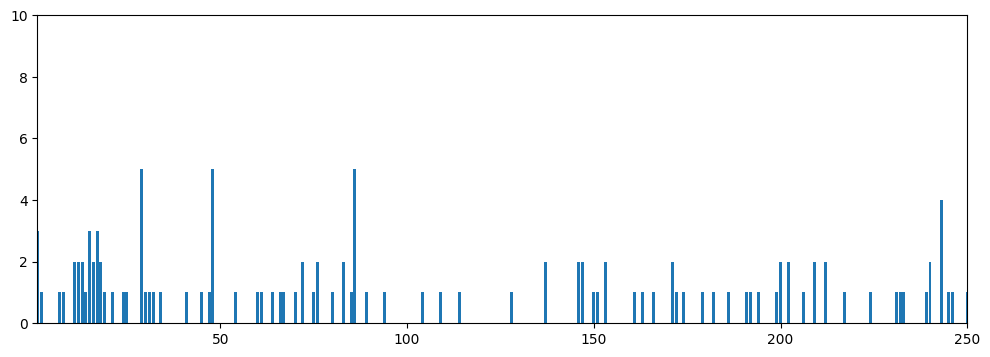

In [ ]:
# Grayscale histogram
digit_gray = np.array(mnist.iloc[1][1:])
x, f = np.unique(digit_gray, return_counts=True)
plt.figure(figsize=(12,4))
plt.bar(x, f)
plt.xlim(1,250)
plt.ylim(0,10)

(array([566.,  17.,  12.,  11.,   3.,   9.,   9.,  11.,   7., 139.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

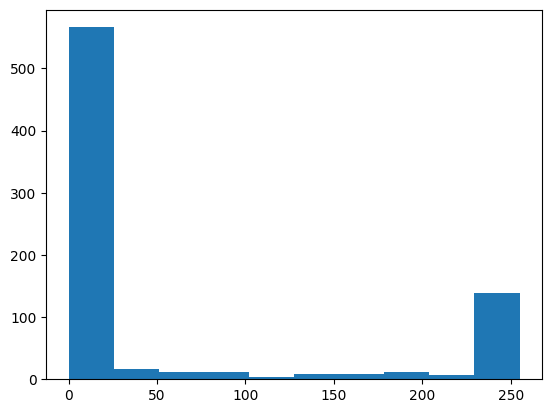

In [ ]:
# Grayscale histogram
digit_gray = np.array(mnist.iloc[1][1:])
plt.hist(digit_gray, bins=10)

In [ ]:
sample_size = 100
digit_0 = mnist.query('label == 0').head(sample_size)
digit_0.drop(columns=['label'], inplace=True)

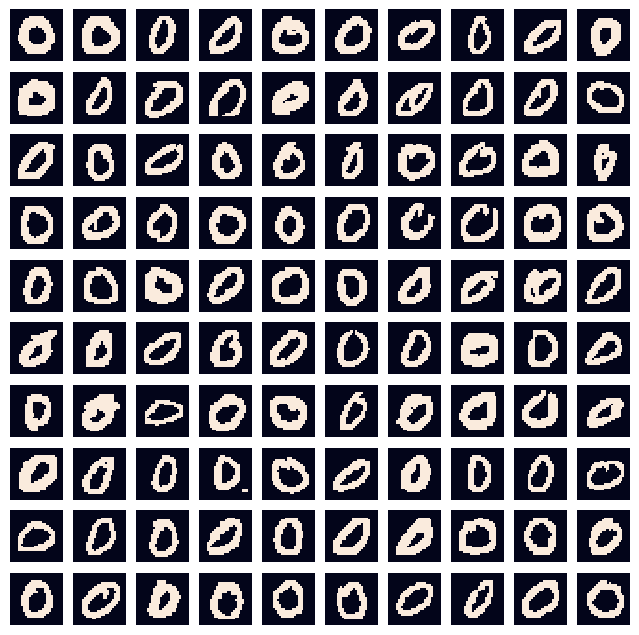

In [ ]:
plt.figure(figsize=(8,8)) 
index = 0 
for obs_i in digit_0.iterrows(): 
    plt.subplot(10, 10, index+1)
    digit_0.iloc[index][np.where(digit_0.iloc[index])[0]] = 1
    sns.heatmap(np.array(obs_i[1]).reshape(28,28), cbar=False)     
    plt.axis('off')     
    index += 1

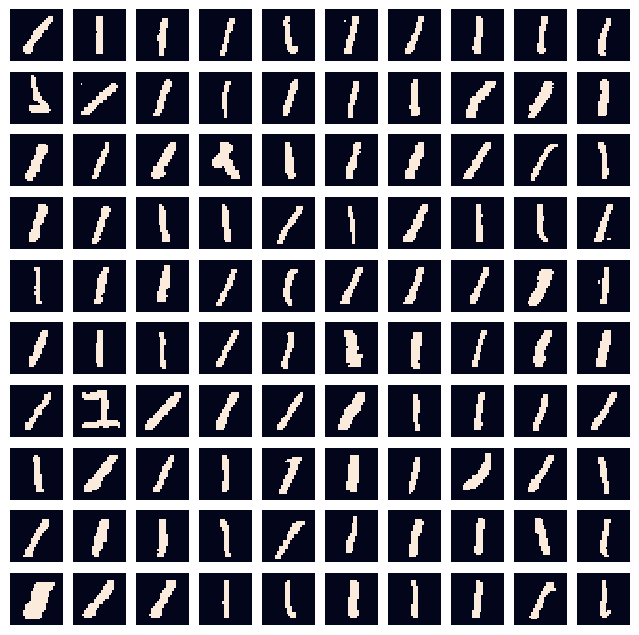

In [ ]:
sample_size = 100
digit_1 = mnist.query('label == 1').head(sample_size)
digit_1.drop(columns=['label'], inplace=True)

plt.figure(figsize=(8,8)) 
index = 0 
for obs_i in digit_1.iterrows(): 
    plt.subplot(10, 10, index+1)
    digit_1.iloc[index][np.where(digit_1.iloc[index])[0]] = 1
    sns.heatmap(np.array(obs_i[1]).reshape(28,28), cbar=False)     
    plt.axis('off')     
    index += 1

(<matplotlib.image.AxesImage at 0x7fadc62d2310>, 0.33163265306122447)

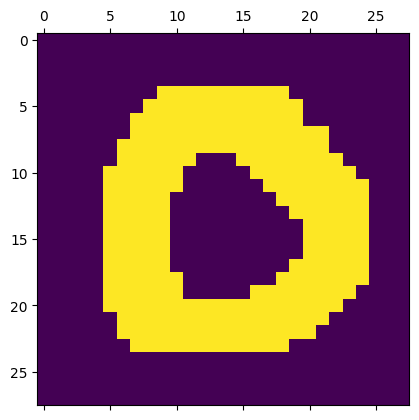

In [ ]:
plt.matshow(np.array(digit_0.iloc[1]).reshape(28,28)), digit_0.iloc[1].mean()

(<matplotlib.image.AxesImage at 0x7fadc61e8410>, 0.12372448979591837)

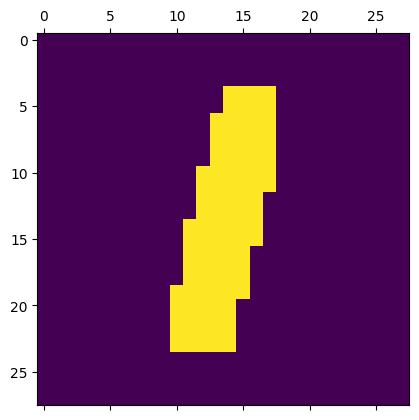

In [ ]:
plt.matshow(np.array(digit_1.iloc[59]).reshape(28,28)), digit_1.iloc[0].mean()

In [ ]:
# Mean of 100 samples of 0 and 1
mean_d0 = digit_0.mean(axis=1)
mean_d1 = digit_1.mean(axis=1)

Text(0.5, 0, 'Digit mean')

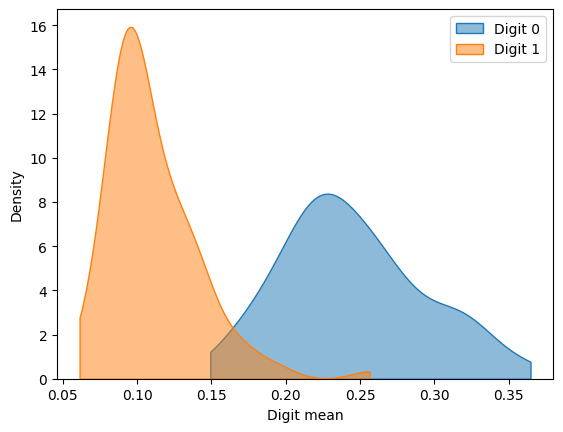

In [ ]:
sns.kdeplot(mean_d0, cut=0, fill=True, alpha=0.5)
sns.kdeplot(mean_d1, cut=0, fill=True, alpha=0.5)
plt.legend(["Digit 0", "Digit 1"])
plt.xlabel("Digit mean")

In [ ]:
std_d0 = digit_0.std(axis=1)
std_d1 = digit_1.std(axis=1)

Text(0.5, 0, 'Digit std')

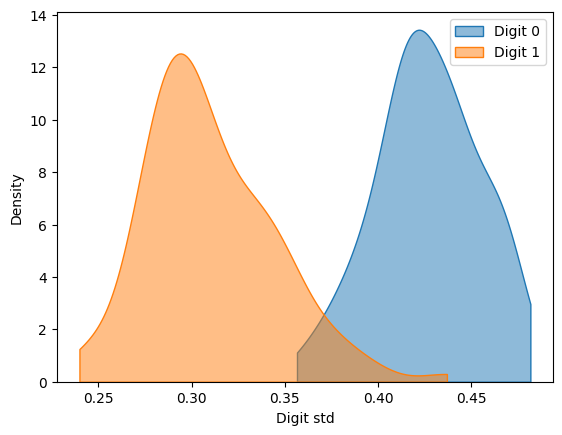

In [ ]:
sns.kdeplot(std_d0, cut=0, alpha=0.5, fill=True)
sns.kdeplot(std_d1, cut=0, alpha=0.5, fill=True)
plt.legend(["Digit 0", "Digit 1"])
plt.xlabel("Digit std")

In [ ]:
digit_moments = pd.DataFrame({'mean': np.concatenate((mean_d0, mean_d1)), 
'std': np.concatenate((std_d0, std_d1)), "digit": ['0']*100+['1']*100})
digit_moments.head()

,mean,std,digit
0,0.312500,0.463808,0
1,0.331633,0.471100,0
2,0.191327,0.393597,0
3,0.233418,0.423276,0
4,0.313776,0.464323,0


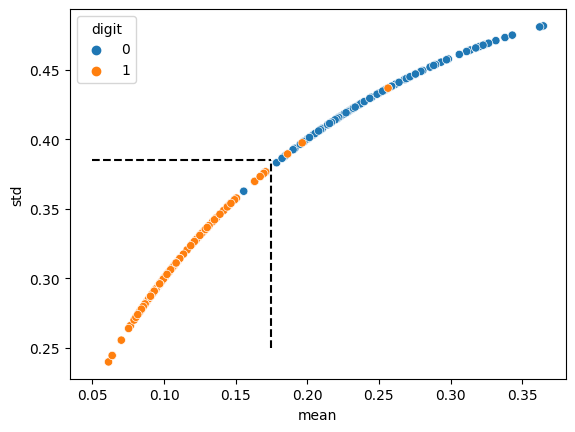

In [ ]:
sns.scatterplot(data=digit_moments, x="mean", y="std", hue='digit')
plt.hlines(0.385, 0.05, 0.175, linestyles="dashed", colors='k')
plt.vlines(0.175, 0.25, 0.385, linestyles="dashed", colors='k')

<AxesSubplot:xlabel='label', ylabel='count'>

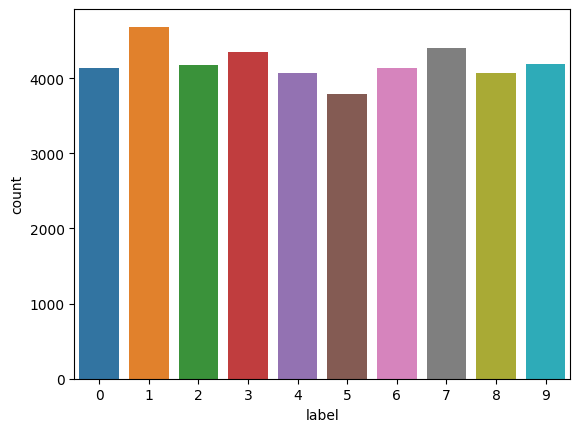

In [ ]:
sns.countplot(data=mnist, x="label")

<AxesSubplot:>

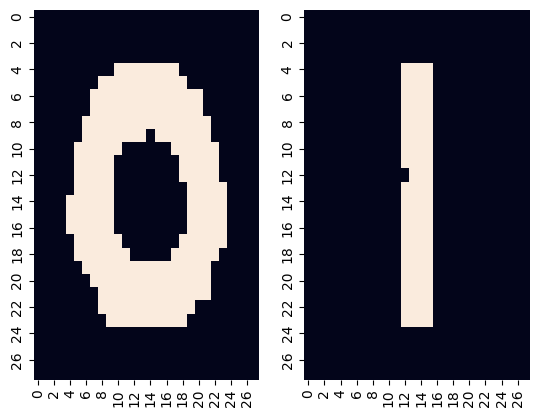

In [ ]:
plt.subplot(1,2,1)
sns.heatmap(np.array(digit_0.iloc[0]).reshape(28,28), cbar=False)
#plt.axis('off')
plt.subplot(1,2,2)
sns.heatmap(np.array(digit_1.iloc[1]).reshape(28,28), cbar=False)
#plt.axis('off')

<AxesSubplot:>

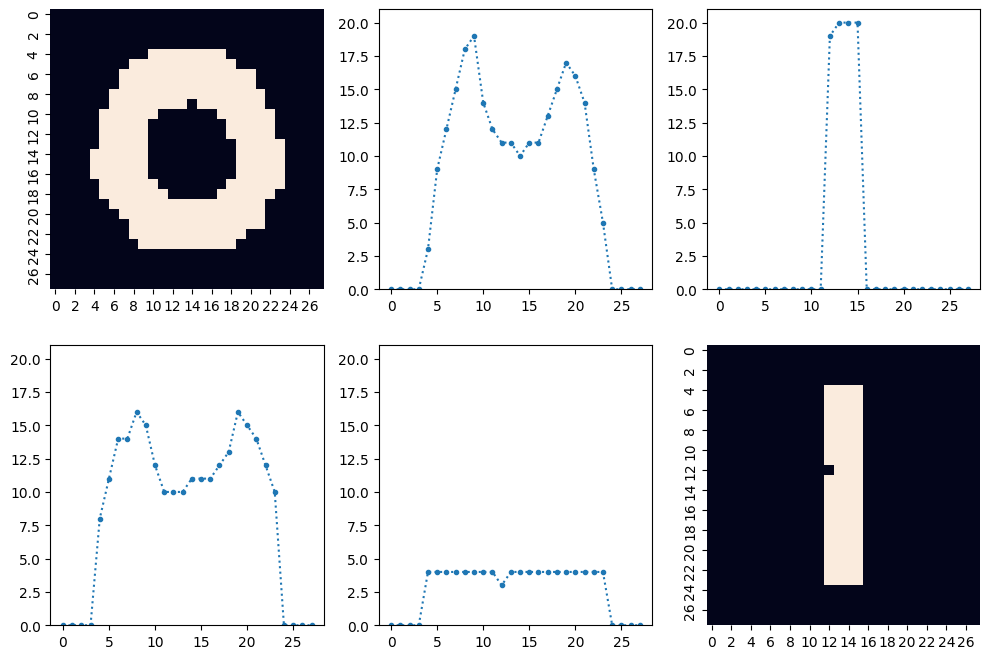

In [ ]:
d0 = np.array(digit_0.iloc[0]).reshape(28,28)
d1 = np.array(digit_1.iloc[1]).reshape(28,28)

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
sns.heatmap(d0, cbar=False)
plt.subplot(2,3,2)
plt.plot(d0.sum(axis=0),':.')
plt.ylim(0, 21)
plt.subplot(2,3,3)
plt.plot(d1.sum(axis=0),':.')
plt.ylim(0, 21)

plt.subplot(2,3,4)
plt.plot(d0.sum(axis=1),':.')
plt.ylim(0, 21)
plt.subplot(2,3,5)
plt.plot(d1.sum(axis=1),':.')
plt.ylim(0, 21)
plt.subplot(2,3,6)
sns.heatmap(d1, cbar=False)

<AxesSubplot:xlabel='mean', ylabel='digit'>

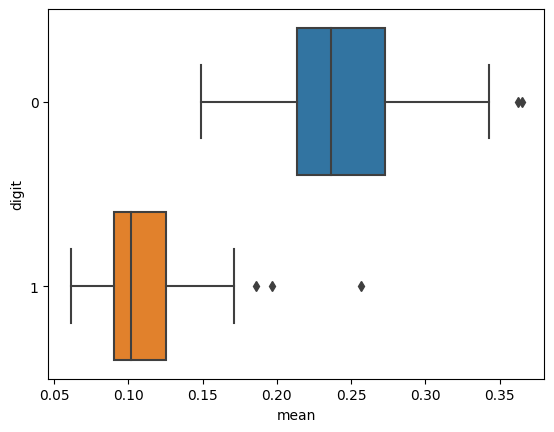

In [ ]:
sns.boxplot(data=digit_moments, x="mean", y="digit")

- **TO DO:** Build a boxplot for all engineered features.
  - What about a split violinplot

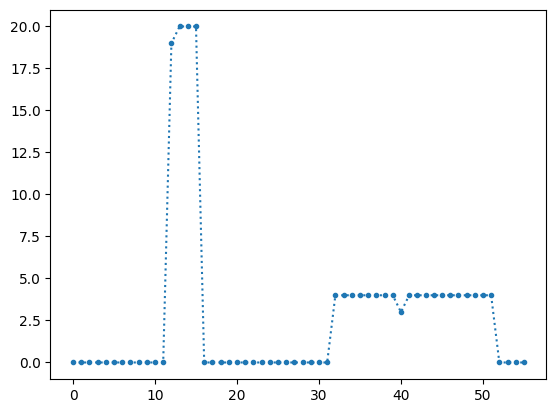

In [ ]:
plt.plot(np.concatenate((d1.sum(axis=0), d1.sum(axis=1))),':.')

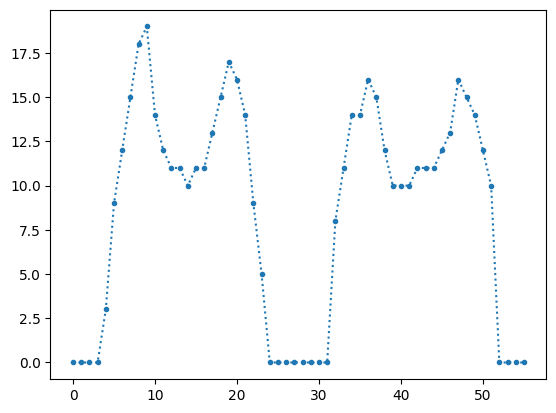

In [ ]:
plt.plot(np.concatenate((d0.sum(axis=0), d0.sum(axis=1))),':.')

In [ ]:
# Measure with and height of digits 0
width_0 = []
height_0 = []
for d0 in digit_0.iterrows():
    d02d = np.array(d0[1]).reshape(28,28)

    ds = np.where(d02d.sum(axis=0))[0]
    w0 = ds[-1] - ds[0]
    width_0 += [w0]

    ds = np.where(d02d.sum(axis=1))[0]
    h0 = ds[-1] - ds[0]
    height_0 += [h0]

# Measure with and height of digits 1
width_1 = []
height_1 = []
for d1 in digit_1.iterrows():
    d12d = np.array(d1[1]).reshape(28,28)

    ds = np.where(d12d.sum(axis=0))[0]
    w1 = ds[-1] - ds[0]
    width_1 += [w1]

    ds = np.where(d12d.sum(axis=1))[0]
    h1 = ds[-1] - ds[0]
    height_1 += [h1]

digit_range = pd.DataFrame({'width': np.concatenate((width_0, width_1)), 
'height': np.concatenate((height_0, height_1)), 
'mean': np.concatenate((mean_d0, mean_d1)), 
'std': np.concatenate((std_d0, std_d1)),
"digit": ['0']*100+['1']*100})
digit_range.head()

,width,height,mean,std,digit
0,19,19,0.312500,0.463808,0
1,19,19,0.331633,0.471100,0
2,13,19,0.191327,0.393597,0
3,17,19,0.233418,0.423276,0
4,19,19,0.313776,0.464323,0


|    |   width |   height |     mean |      std |   sum_R + sum_C |   digit |
|---:|--------:|---------:|---------:|---------:|--------:|--------:|
|  0 |      19 |       19 | 0.3125   | 0.463808 |       28+28 |       0 |
|  1 |      19 |       19 | 0.331633 | 0.4711   |       28+28 |       0 |
|  2 |      13 |       19 | 0.191327 | 0.393597 |       28+28 |       0 |
|  3 |      17 |       19 | 0.233418 | 0.423276 |       28+28 |       0 |
|  4 |      19 |       19 | 0.313776 | 0.464323 |       28+28 |       0 |

<AxesSubplot:xlabel='width', ylabel='mean'>

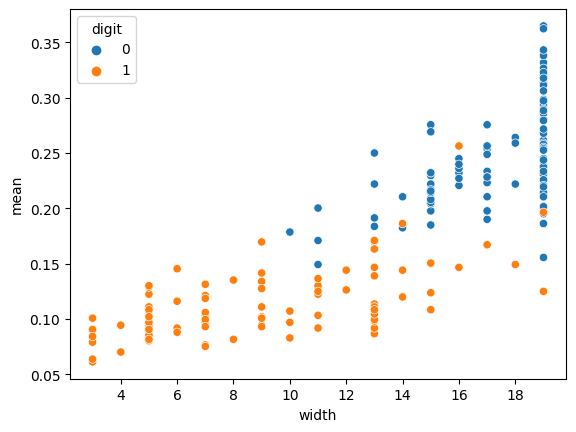

In [ ]:
sns.scatterplot(data=digit_range, x="width", y="mean", hue='digit')

<AxesSubplot:xlabel='height', ylabel='mean'>

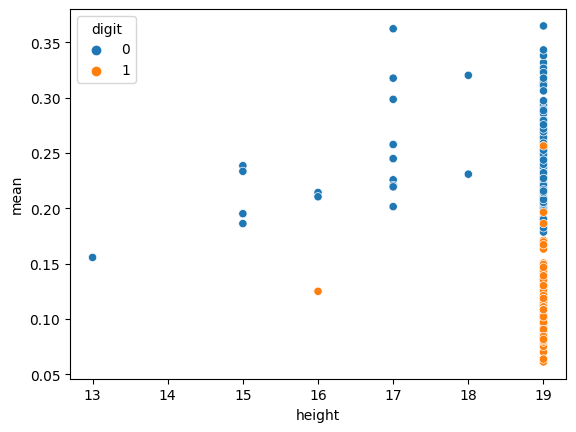

In [ ]:
sns.scatterplot(data=digit_range, x="height", y="mean", hue='digit')

<AxesSubplot:xlabel='height', ylabel='Density'>

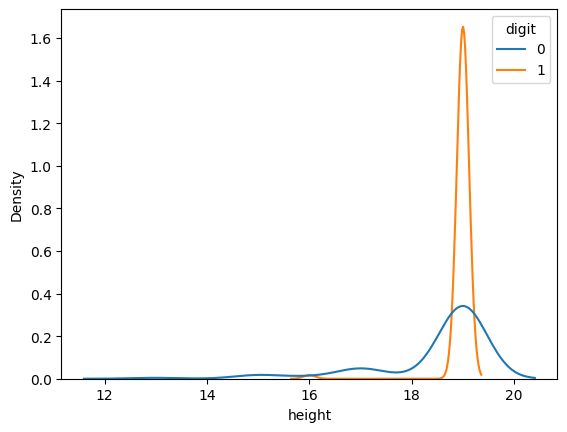

In [ ]:
sns.kdeplot(data=digit_range, x="height", hue="digit")

<AxesSubplot:xlabel='width', ylabel='Density'>

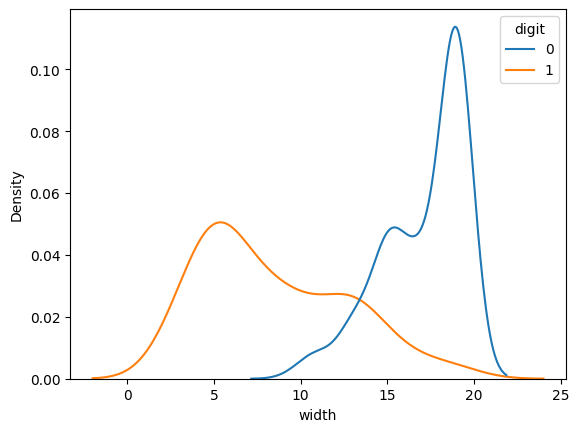

In [ ]:
sns.kdeplot(data=digit_range, x="width", hue="digit")

width     0.403652
height    0.048630
mean      0.582501
std       0.576353
dtype: float64

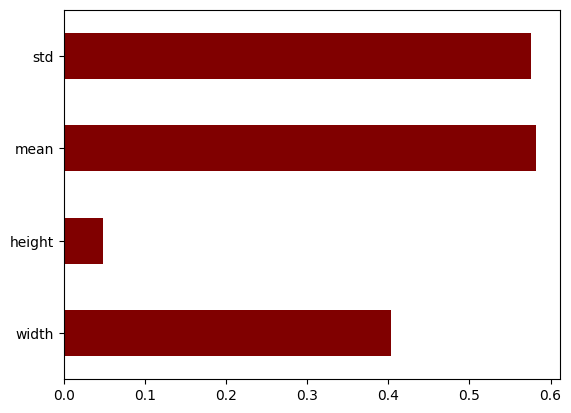

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = digit_range.iloc[:,:-1]
y = digit_range.digit
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind="barh", color="maroon")
feat_importances

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

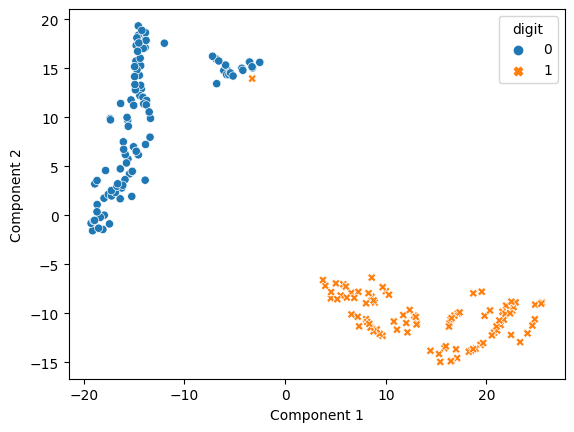

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

standardized_range = StandardScaler().fit_transform(digit_range)

tsne = TSNE(n_components = 2, perplexity = 20, random_state=0, learning_rate='auto')

tsne_results = tsne.fit_transform(standardized_range)

tsne_results = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])

tsne_results['digit'] = digit_range.digit

sns.scatterplot(data=tsne_results, x="Component 1", y="Component 2", style="digit", hue="digit")

Text(110, 3, 'Digit 1')

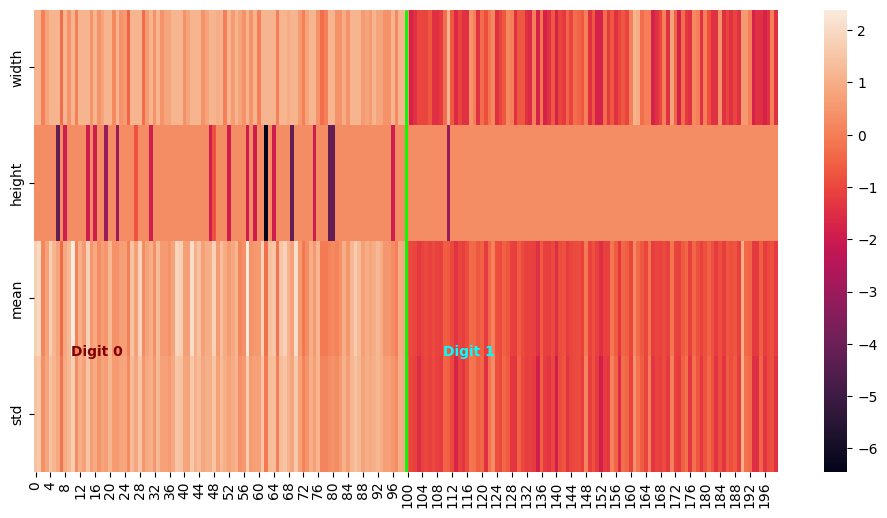

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.DataFrame(standardized_range, columns=digit_range.columns).iloc[:,:-1].T)
plt.vlines(100, 0, 785, colors='lime', linewidth=2)
plt.text(10, 3, "Digit 0", color="maroon", fontweight="bold")
plt.text(110, 3, "Digit 1", color="aqua", fontweight="bold")

In [ ]:
digits_01 = pd.concat((digit_0, digit_1))
digits_01['digit'] = [0]*100 + [1]*100

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

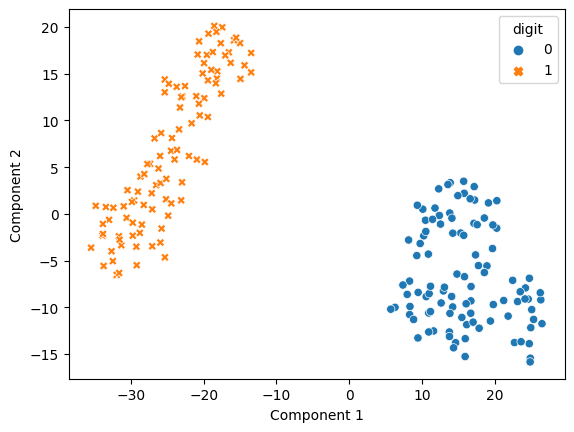

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

standardized_digits = StandardScaler().fit_transform(digits_01)

tsne = TSNE(n_components = 2, perplexity = 20, random_state=0, learning_rate='auto')

tsne_results = tsne.fit_transform(standardized_digits)

tsne_results = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])

tsne_results['digit'] = pd.Categorical(digits_01.digit)

sns.scatterplot(data=tsne_results, x="Component 1", y="Component 2", style="digit", hue="digit")

Text(110, 30, 'Digit 1')

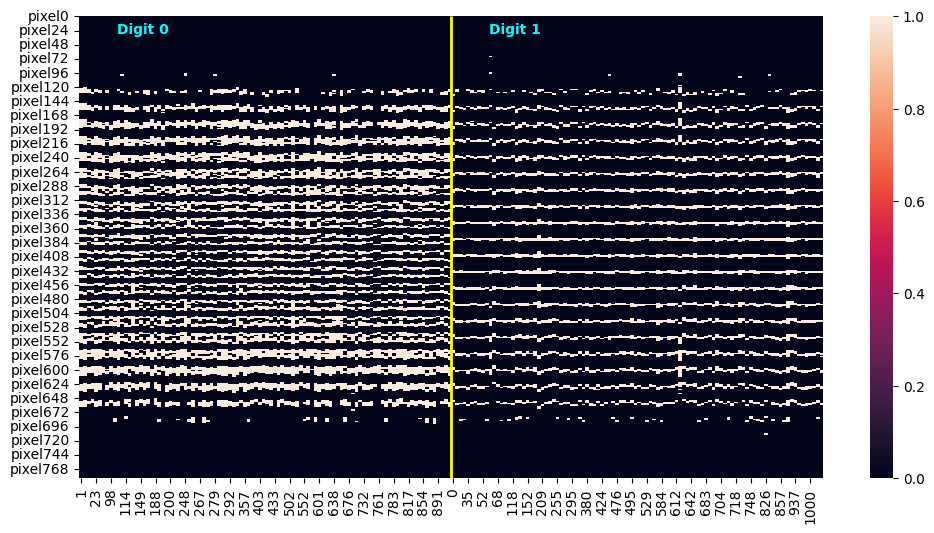

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(digits_01.iloc[:,:-1].T)
plt.vlines(100, 0, 785, colors='yellow', linewidth=2)
plt.text(10, 30, "Digit 0", color="aqua", fontweight="bold")
plt.text(110, 30, "Digit 1", color="aqua", fontweight="bold")

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

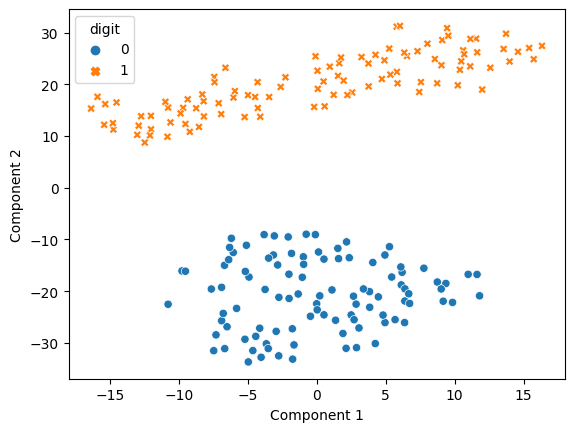

In [ ]:
digit_0 = mnist.query('label == 0').head(sample_size)

digit_1 = mnist.query('label == 1').head(sample_size)

digits_01 = pd.concat((digit_0, digit_1))
digits_01['digit'] = [0]*100 + [1]*100

standardized_digits = StandardScaler().fit_transform(digits_01)

tsne = TSNE(n_components = 2, perplexity = 20, random_state=0, learning_rate='auto')

tsne_results = tsne.fit_transform(standardized_digits)

tsne_results = pd.DataFrame(tsne_results, columns=['Component 1', 'Component 2'])

tsne_results['digit'] = pd.Categorical(digits_01.digit)

sns.scatterplot(data=tsne_results, x="Component 1", y="Component 2", style="digit", hue="digit")

Text(110, 30, 'Digit 1')

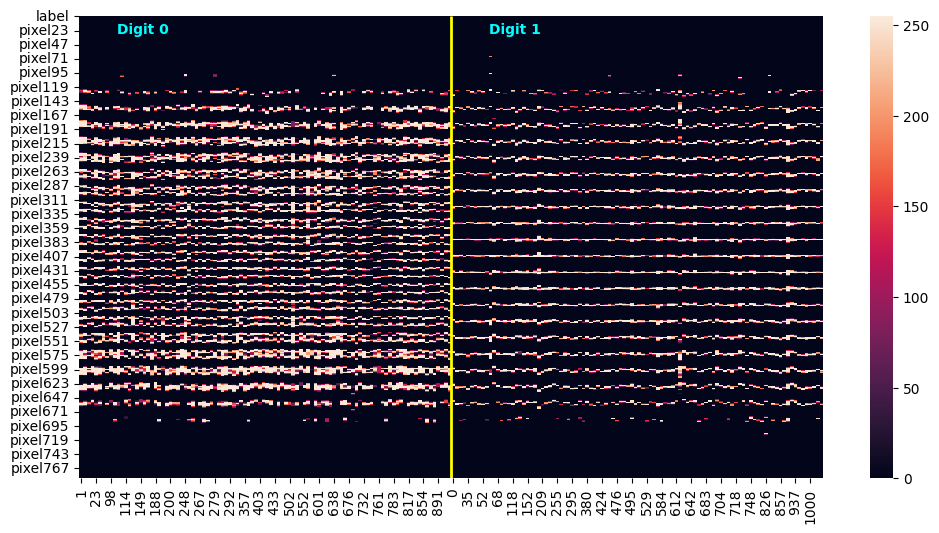

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(digits_01.iloc[:,:-1].T)
plt.vlines(100, 0, 785, colors='yellow', linewidth=2)
plt.text(10, 30, "Digit 0", color="aqua", fontweight="bold")
plt.text(110, 30, "Digit 1", color="aqua", fontweight="bold")

Check: 
- https://github.com/marsgr6/r-scripts/blob/master/notebooks/pattern_preprocessing.ipynb
- https://medium.com/@garora039/dimensionality-reduction-using-t-sne-effectively-cabb2cd519b
- https://www.kaggle.com/code/lorinc/feature-extraction-from-images
- https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/
- https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/?utm_source=pocket_saves
- https://anaconda.org/marsgr6/decision_trees/notebook

- **TO DO: Research** 
  - Color feature extraction for images.
  - Gray-scale histogram

### Long-life learning

**ML tutorials from www.featureranking.com**

- [Data Preparation for Predictive Modeling](https://marsgr6.github.io/presentations/Data_Preparation_for_Predictive_Modeling.html#/)
- [SK Part 0: Introduction to Predictive Modeling with Python and Scikit-Learn](https://marsgr6.github.io/presentations/SK_Part_0_Introduction_to_Predictive_Modeling_with_Python_and_Scikit-Learn.html#/)
- [SK Part 1: Basic Modeling](https://marsgr6.github.io/presentations/SK_Part_1_Basic_Modeling.html#/)
- [SK Part 2: Feature Selection and Ranking](https://marsgr6.github.io/presentations/SK_Part_2_Feature_Selection_and_Ranking.html#/)
- [SK Part 3: Model Evaluation](https://marsgr6.github.io/presentations/SK_Part_3_Model_Evaluation.html#/)
- [SK Part 4: Cross-Validation and Hyperparameter Tuning](https://marsgr6.github.io/presentations/SK_Part_4_Cross-Validation_and_Hyperparameter_Tuning.html#/)
- [SK Part 5: Advanced Topics, Pipelines, Statistical Model Comparison, and Model Deployment](https://marsgr6.github.io/presentations/SKPart_5_Advanced_Topics_Pipelines_Statistical_Model_Comparison_and_Model_Deployment.html#/)
- [SK Part 6: Clustering](https://marsgr6.github.io/presentations/SK_Part_6_Clustering.html#/)
- [SK Part 7: Neural Networks - A Simple Case Study](https://marsgr6.github.io/presentations/SK_Part_7_Neural_Networks_A_Simple_Case_Study.html#/)
- [Case Study: Predicting Income Status](https://marsgr6.github.io/presentations/Case_Study_Predicting_Income_Status.html#/)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cce3455d-da08-4c10-a6fe-39f2a30c6a51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>